<a href="https://colab.research.google.com/github/Anuj-gitch/DataScience/blob/main/Analyzing_Traffic_police_Activity/Analyzing_Police_Activity_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = red> **Project Description : Analyzing Police Activity with pandas**

Course will give you the chance to apply that knowledge by answering interesting questions about a real dataset! You will explore the Stanford Open Policing Project dataset and analyze the impact of gender on police behavior. During the course, you will gain more practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. Analyzing Police Activity with pandas will give you valuable experience analyzing a dataset from start to finish, preparing you for your data science career!



## <font color = red> **Chapter 0 : Prepare Tools**

In [140]:
# data Analysis Tools
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

---
## <font color = blue> **Chapter 1 : Preparing the data for analysis**
---


Before beginning your analysis, it is critical that you first examine and clean the dataset, to make working with it a more efficient process. In this chapter, you will practice fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset.


### **Chapter 1.1 : Stanford Open Policing Project dataset**

---



In this course, you'll be practicing a lot of what you've learned about pandas already to answer interesting questions about a real dataset. You'll gain valuable experience analyzing a dataset from start to finish, which will help to prepare you for your data science career.


#### Introduction to the dataset

Let's start by introducing the data. You'll be working with a dataset of 
* Traffic stops by police officers 

That was collected by the Stanford Open Policing Project. They've collected data from 31 US states, but in this course you'll be focusing on data from the state of Rhode Island. For size reasons, some of the columns and rows have been removed, 

But you can download the full dataset for any of the 31 states from the project's website.

* Download data for any state:<br>
  https://openpolicing.stanford.edu/


#### Preparing the data

This first chapter is about preparing the data for analysis. Before beginning an analysis, it's critical that you first 

* Examine the data to make sure that you understand it, and then 

* clean the data, to make working with it a more efficient process. 

As always, we'll start by importing pandas as pd. We'll use the read_csv() function to read in the dataset from a file, and then store it in a DataFrame called ri, which stands for Rhode Island. 

We'll use the head() method in order to take a quick glance at the DataFrame, though there are many more columns than can fit on this screen. 

Each row represents a single traffic stop. 



In [141]:
import pandas as pd
ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')

In [142]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


You'll notice that the county_name column contains <font color = green> **NaN values, which indicate missing values.** </font> These are often values that were not collected during the data gathering process, or are irrelevant for that particular row.

#### Locating missing values (1)

It's important that you locate missing values so that you can proactively decide how to handle them. You may recall that the isnull() method generates a DataFrame of True and False values: True if the element is missing, and False if it's not.

In [143]:
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


#### Locating missing values (2)
One useful trick is to take the sum of this DataFrame, which outputs a count of the number of missing values in each column. How does that calculation work? Well, 
* The ```sum()``` method calculates the sum of each column by default, 
* And ```True = 1``` values are treated as ones, while ```False = 0``` values are treated as zeros.

In [144]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

#### Dropping a column
Let's compare these missing value counts to the DataFrame's shape. You'll notice that the: 
* <font color = green> County_name column contains as many missing values as there are rows, meaning that it only contains missing values. 

Since it contains no useful information, this: 

* <font color = green> column can be dropped using the ```drop()``` method. 

Besides specifying the column name, you need to specify that you're dropping from the columns axis, and that you want the operation to occur in place, which avoids an assignment statement.

In [145]:
ri.drop('county_name', axis = 'columns', inplace = True)

#### Dropping rows
Finally, let's take a look at one more method related to missing values. The <font color = green, size = 6px> **```dropna()```** </font> method is a great way to drop rows based on the presence of missing values in that row. For example, let's pretend that the stop_date and stop_time columns are critical to our analysis, and thus a row is useless to us without that data. We can tell pandas to drop all rows that have a missing value in either the stop_date or stop_time column. Because we specified a subset, the dropna() method only takes these two columns into account when deciding which rows to drop.

In [146]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


* **```.dropna()```**: Drop rows based on the presence of missing values

In [147]:
# drop stop_date, stop_time
ri.dropna(subset=['stop_date','stop_time'] , inplace = True)

### **Chapter 1.2: Using proper data types**

---



In the last set of exercises, you began cleaning the dataset by removing columns and rows that will not be useful for your upcoming analyses. Now, we're going to continue cleaning the dataset by ensuring that each of the columns has the proper data type.

#### Examining the data types
Let's take a look at the dtypes attribute of the DataFrame. Every Series has a data type, which was automatically inferred by pandas when it was reading in the CSV file.

In [148]:
# What is datatype?
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

As you can see, **the only data types currently in use are object and bool**. The object data type usually means that a Series is made up of Python strings, though it can indicate the presence of other Python objects such as lists. The bool data type is short for Boolean, which means that a Series is made up of True and False values. pandas also supports other data types, such as int for integers, float for floating point values, datetime for dates and times, and category for categorical variables.

**Type of dtype in pandas**

* object:Python strings (or other Python objects)
* bool:True and False values
* Other types:int, float, datetime, categor

#### Why do data types matter?
But why does the data type of a pandas Series even matter? Data types matter mostly because 

* They affect which operations you can perform on a given Series. 

* In particular, it's beneficial not to store data as strings when possible. For example, mathematical operations can be performed on ints and floats, but those operations will fail if the numbers are stored as strings. 

* The datetime type enables a rich set of date-based attributes and methods that are not possible with strings. 

* The category data type results in less memory usage and faster processing than strings. 

* And the bool data type enables logical and mathematical operations that we'll use during the course.

#### Fixing a data type

Let's see an example of how you might fix an improper data type. We'll imagine a DataFrame named apple that has a Series named price, which stores the closing price of Apple company stock each day. 

In [149]:
apple = pd.DataFrame()
apple['date'] = ['2/13/18','2/14/18','2/15/18']
apple['time'] = ['16:00','16:00','16:00']
apple['price'] = ['164.34','167.37','172.99']
apple

,date,time,price
0,2/13/18,16:00,164.34
1,2/14/18,16:00,167.37
2,2/15/18,16:00,172.99


You can check the data type of the price Series using its dtype attribute. It reports a dtype of "O", which stands for object and means that the numbers are actually stored as strings. 

In [150]:
apple.dtypes

date     object
time     object
price    object
dtype: object

To change the data type of the price Series from object to float, you can use the astype() method, to which you pass the new data type as an argument. Then, you simply overwrite the original Series. 

In [151]:
apple['price'] = apple.price.astype('float')

If you check the data type again, you can see that it has changed to float. You might have noticed that on the right side of the equals sign, I used dot notation to refer to the price Series, rather than bracket notation. They mean the same thing, but I'll be using dot notation throughout this course, because I find that dot notation makes pandas code more readable. However, it's worth noting that you must use bracket notation on the left side of an assignment statement to create a new Series or overwrite an existing Series.

* `Dot notation: apple.price`
* `Bracket notation: apple['price']`

### **Chapter 1.3: Creating a DatetimeIndex**

---
In the last exercise, you fixed the data type of the is_arrested column. Now, we're going to build a DatetimeIndex for our DataFrame.

#### Using datetime format
Let's take a look at the head of the dataset again. As you can see, the date and time of each traffic stop are stored in separate columns, both of which are object columns. 

In [152]:
display(ri.head(),ri.dtypes)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Because we'll be using stop_date and stop_time in our analysis, we're going to combine these two columns into a single column and then convert it to pandas' datetime format. This will be beneficial because unlike object columns, datetime columns provide date-based attributes that will make our analysis easier.

1. Combine stop_date and stop_time into one column 
2. Convert it to datetime format

#### Combining object columns
Let's see an example of this using the **apple stock price DataFrame** from the previous video. 
* Date and time are stored in separate columns, so the first task is to combine these two columns using a string method. 
* As you might remember from previous courses, string methods, such as replace(), are Series methods available via the str accessor. 


In [153]:
apple

,date,time,price
0,2/13/18,16:00,164.34
1,2/14/18,16:00,167.37
2,2/15/18,16:00,172.99


In this example, we're replacing the forward slash in the date column with a dash. It outputs a new Series in which the string replacement has been made, though this change is temporary since we haven't saved the new Series. 

In [154]:
# replacing / with -
apple.date.str.replace('/','-')

0    2-13-18
1    2-14-18
2    2-15-18
Name: date, dtype: object

Anyway, **to combine the columns, we're going to use the str dot cat() method**, which is short for concatenate. We'll concatenate the date column with the time column, and tell pandas to separate them with a space, storing the result in a Series object named combined. You can see that the combined Series contains both the date and time. It's still an object column, but it's now ready for conversion to datetime format.

In [155]:
combined = apple.date.str.cat(apple.time, sep = ' ')
combined

0    2/13/18 16:00
1    2/14/18 16:00
2    2/15/18 16:00
Name: date, dtype: object

#### Converting to datetime format
* To convert the combined Series to datetime format, you simply pass it to the to_datetime() function, and store the result in a new column. 

* We didn't even need to specify that the original data was in month-day-year format, instead pandas just figured it out. 



In [156]:
apple['date_and_time'] = pd.to_datetime(combined)
display(apple,'-----','data_Type', '-----',apple.dtypes)

,date,time,price,date_and_time
0,2/13/18,16:00,164.34,2018-02-13 16:00:00
1,2/14/18,16:00,167.37,2018-02-14 16:00:00
2,2/15/18,16:00,172.99,2018-02-15 16:00:00


'-----'

'data_Type'

'-----'

date                     object
time                     object
price                   float64
date_and_time    datetime64[ns]
dtype: object

Looking at the updated DataFrame, you can see that the new column contains both the date and time, and that it is stored in a more standard way. From the dtypes attribute, you can see that the new data type of the new column is datetime, instead of object.

#### Setting the index
One final step that we'll take is to set the datetime column as the index. That will make it easier to filter the DataFrame by date, plot the data by date, and so on. **We'll use the set_index() method, and specify that the operation should occur in place to avoid an assignment statement.** You can see that the default index has been replaced with the datetime column. And the index is now a special type called DatetimeIndex. 

In [157]:
apple.set_index('date_and_time', inplace = True)

In [158]:
apple

,date,time,price
date_and_time,,,
2018-02-13 16:00:00,2/13/18,16:00,164.34
2018-02-14 16:00:00,2/14/18,16:00,167.37
2018-02-15 16:00:00,2/15/18,16:00,172.99


As a reminder, when an existing column becomes the index, it is no longer considered to be one of the DataFrame columns.

---

## **<font color = 'blue'>Chapter: 2. Exploring the relationship between gender and policing**

---



Does the gender of a driver have an impact on police behavior during a traffic stop? In this chapter, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

### **Chapter 2.1: Do the genders commit different violations?**

---



we focused on preparing the traffic stops dataset for analysis. In this chapter, you'll use the dataset to explore the relationship between gender and policing, and you'll practice figuring out how to use pandas to answer specific questions.


#### Counting unique values (1)
Let's start by discussing a few methods that will help you with your analysis. 

The first method is `value_counts()`, which counts the unique values in a Series. It's best suited for a column that contains categorical rather than numerical data. For example, we can apply value_counts() to the stop_outcome column, which contains the outcome of each traffic stop. The results are displayed in descending order, so you can see that the most common outcome is a citation, also known as a ticket, and the second most common outcome is a warning.

In [159]:
# Apply the value count on stop_outcome columns
ri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

* **.value_counts()** : Counts the unique values in a Series
* Best suited for categorical data


#### Counting unique values (2)
Because **value_counts()** outputs a pandas Series, you can take the sum of this Series by simply adding the sum() method on the end. This is known as method chaining, a powerful technique we'll use throughout the course. The sum() of the value_counts() is actually equal to the number of rows in the DataFrame, which will be the case for any Series that has no missing values.



In [160]:
# adding sum method in the end
ri.stop_outcome.value_counts().sum()

86539

In [161]:
ri.shape

(91741, 14)

#### Expressing counts as proportions
Rather than examining the raw counts, you might prefer to see the stop outcomes as proportions of the total. So if you wanted to know what percentage of traffic stops ended in a citation, you would divide the number of citations by the total number of outcomes and get 0.89, or 89%. Rather than doing these calculations manually, you can instead **set the normalize parameter of value_counts() to be True, and it will output proportions instead of counts**. Citations are 89%, warnings are 6%, driver arrests are 3%, and so on.

In [162]:
# calculate the proportion instead of count
ri.stop_outcome.value_counts(normalize = True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

#### Filtering DataFrame rows
Let's now take a look at the value_counts() for a different column, driver_race. You can see that there are five unique categories present. 

In [163]:
# value count to ddriver_race
ri.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

If you wanted to **filter the DataFrame to only include drivers of a particular race, such as White**, you would write that as a condition and put it inside brackets, as you've seen previously. We'll save the result in a new object. **The shape of the new DataFrame is 61,870 rows, because that's the number of White drivers in the dataset, and 13 columns**. You can now analyze this smaller DataFrame separately.

In [164]:
white = ri[ri.driver_race == 'White']
white.shape

(61872, 14)

#### Comparing stop outcomes for two groups
For example, you could repeat the analysis of stop outcomes, but focus on White drivers only. Like before, you select the stop_outcome column and then chain the **value_counts()** method on the end. You could compare these results with the outcomes for another race, such as Asian, simply by changing the condition inside the brackets and then repeating the calculation. If you compare these two sets of numbers, you can see that the stop outcomes are fairly similar for these two groups.

In [165]:
# Proportion of stop_outcome in white
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [166]:
asian = ri[ri.driver_race == 'Asian']
# Proportion of stop_outcome in asians
asian.stop_outcome.value_counts(normalize=True)

Citation            0.923013
Warning             0.045188
Arrest Driver       0.017573
No Action           0.008368
N/D                 0.004184
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

### **Chapter 2.2: Does gender affect who gets a ticket for speeding?**

---
we compared the traffic violations committed by each gender. In this section, we'll narrow our focus to the relationship between gender and stop outcomes for one specific violation, namely speeding.

#### Filtering by multiple conditions (1)
We'll need to use one additional technique for this analysis, namely filtering a DataFrame by multiple conditions. You may remember this technique from previous courses, but we'll review it here. In the last exercise, you used a single condition, driver_gender equals F, to create a DataFrame of female drivers. It has 23,774 rows because that's the number of rows in the ri DataFrame that satisfy this condition.

In [167]:
ri[ri.driver_gender == 'F']

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
5,RI,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
8,RI,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
11,RI,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
13,RI,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91723,RI,2015-12-31,07:31,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X1
91728,RI,2015-12-31,09:33,F,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone X4
91736,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


#### Filtering by multiple conditions (2)
What if we wanted to create a second DataFrame of female drivers, but only those who were arrested? We simply add a second condition to the filter, namely that the is_arrested column equals True. Notice that each condition is surrounded by parentheses, and there is an ampersand between the two conditions, which represents the logical AND operator. The second DataFrame is much smaller because it only includes rows that satisfy both conditions, meaning that it only includes female drivers who were also arrested.

* Each condition is surrounded by parentheses 
* Ampersand ( & ) represents the and operator


In [168]:
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]
female_and_arrested.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
120,RI,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2
163,RI,2005-10-06,21:50,F,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone X4
276,RI,2005-10-10,17:50,F,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K3
284,RI,2005-10-11,00:40,F,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False,Zone X4
329,RI,2005-10-13,01:55,F,White,Call for Service,Other,False,NaN,Arrest Driver,True,30+ Min,False,Zone K2


In [169]:
female_and_arrested.shape

(669, 14)

* Only includes female drivers who were arrested

#### Filtering by multiple conditions (3)
When filtering a DataFrame by multiple conditions, another option is to use the vertical pipe character between the two conditions. The pipe represents the logical OR operator, which indicates that a row should be included in the DataFrame if it meets either condition. This DataFrame is larger than the last one because it includes all females regardless of whether they were arrested, as well as all drivers who were arrested, regardless of whether they are female.

* Pipe ( | ) represents the or operator
* Includes all females
* Includes all drivers who were arrested

In [170]:
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]

In [171]:
female_or_arrested.shape

(26183, 14)

#### Rules for filtering by multiple conditions
Here's a quick summary of the rules for filtering DataFrames by multiple conditions: 

> Ampersand ( & ): only include rows that satisfy both conditions 

> Pipe ( | ): include rows that satisfy either condition

> Each condition must be surrounded by parentheses 

> Conditions can check for equality ( == ), inequality ( != ), etc.

> Can use more than two conditions

#### Correlation, not causation
In the upcoming exercises, you'll analyze the relationship between gender and stop outcome when a driver is pulled over for speeding. In other words, you're examining the data to assess whether there is a correlation between these two attributes. However, it's important to note that we're not going to draw any conclusions about causation during this course, since we don't have the data or the expertise required to do so. Instead, we're simply exploring the relationships between different attributes in the dataset.


<ol>
  <li> Analyze the relationship between gender and stop outcome</li>
  <ul>
    <li> Assess whether there is a correlation</li>
  </ul>
  <li> Not going to draw any conclusions about causation </li>
  <ul>
    <li> Would need additional data and expertise </li>
    <li> Exploring relationships only </li>
  </ul>

### **Chapter 2.3: Does gender affect whose vehicle is searched?**

---
During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? Let's review a few pandas techniques that will help us to answer this question.

#### Math with Boolean values
Recall that you can perform mathematical operations on Boolean values. For example, 

* you previously used the isnull() method to generate a DataFrame of True and False values, and then took the sum() to count the missing values in each column. 

* This worked because True values were treated as ones and False values were treated as zeros. 





In [172]:
# isnull() method to generate a DataFrame of True and False
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

* Now we'll use the NumPy library to demonstrate a different operation, namely the mean. If you take the mean() of the list 0 1 0 0 you'll get 0.25, calculated as 1 divided by 4. 

In [173]:
import numpy as np
np.mean([0, 1, 0, 0])

0.25

* Similarly, if you take the mean() of the list False True False False, you'll also get 0.25. Thus, __the mean of a Boolean Series represents the percentage of values that are True__.

In [174]:
np.mean([False, True,           False, False])

0.25

#### Taking the mean of a Boolean Series
Now, let's see a real example of why it's useful to be able to take the mean of a Boolean Series. 

* We'll first calculate the percentage of stops that result in an arrest using the value_counts() method. 

In [175]:
ri.is_arrested.value_counts(normalize=True)

False    0.964432
True     0.035568
Name: is_arrested, dtype: float64

The arrest rate is around 3.6% since that's the percentage of True values. Note that this would work on an object column or a Boolean column. But we can get the same result more easily by taking the mean() of the is_arrested Series. This method only works because the data type is Boolean. This is exactly why you changed the data type of this Series from object to Boolean back in the first chapter.

In [176]:
display(ri.is_arrested.mean(),
        ri.is_arrested.dtype)

0.03556777868937704

dtype('O')

#### Comparing groups using groupby (1)
The second technique we'll review is <font color = 'green'> __groupby()__ </font> , which you've used in previous courses. 

Let's pretend that you wanted to study the arrest rate by police district. You can see that there are six districts by using the Series method unique(). 



In [177]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

One approach we've used to compare groups is to filter the DataFrame by each group, and then perform a calculation on each subset. So to calculate the arrest rate in Zone K1, we would filter by that district, select the is_arrested column, and then take the mean(). The arrest rate is about 2.4%, which is lower than the overall arrest rate of 3.6%.

In [178]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024346149210558034

#### Comparing groups using groupby (2)
Next we calculate the arrest rate in Zone K2, which is about 3.1%. But rather than repeating this process for all six districts, we can instead group by the district column, which will perform the same calculation for all districts at once. You can see a noticeably higher arrest rate in Zone X4.

In [179]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [180]:
ri['is_arrested_numeric'] = pd.to_numeric(ri.is_arrested)

In [181]:
ri.groupby('district').is_arrested_numeric.mean()

district
Zone K1    0.024346
Zone K2    0.030801
Zone K3    0.032308
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested_numeric, dtype: float64

#### Grouping by multiple categories
You can also group by multiple categories at once. For example, you can group by district and gender by passing it as a list of strings. This computes the arrest rate for every combination of district and gender. In other words, you can see the arrest rate for males and females in each district separately. Note that if you reverse the ordering of the items in the list, grouping first by gender and then by district, the calculations will be the same but the presentation of the results will be different. You can use whichever option makes it easier for you to understand the results.

In [182]:
ri.groupby(['district', 'driver_gender']).is_arrested_numeric.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested_numeric, dtype: float64

**Here `is_arrested` boolen not working in colab so we have converted is_arrested boolen in to numeric which turned out to be as 1 or 0**

### **Chapter 2.4: Does gender affect who is frisked during a search?**

---
you investigated whether the gender of a driver affects the likelihood that their vehicle will be searched. In this section, we'll take a look at what happens during a search.

#### Examining the search types
As you've seen previously, the search_conducted field is True if there's a search during a traffic stop, and False otherwise. There's also a related field, search_type, that contains additional information about the search. Notice that the search_type field has 83,229 missing values, which is identical to the number of False values in the search_conducted field. That's because any time a search is not conducted, there's no information to record about a search, and thus the search_type will be missing. Note that the value_counts() method excludes missing values by default, and so we specified dropna equals False in order to see the missing values.

In [183]:
ri.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [184]:
ri.search_type.value_counts(dropna = False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

#### Examining the search types
There are only five possible values for search_type, which you can see at the top of the value_counts() output: Incident to Arrest, Probable Cause, Inventory, Reasonable Suspicion, and Protective Frisk. But sometimes, multiple values are relevant for a single traffic stop, in which case they're separated by commas. Let's focus on Inventory, meaning searches in which the police took an inventory of the vehicle. Looking at the third line of the value_counts() output, we see 219, which is the number of searches in which Inventory was the only search type. But what if we wanted to know the total number of times in which an inventory was done during a search? We'd also have to include any stops in which Inventory was one of multiple search types. To do this, we'll use a string method.

#### Searching for a string (1)
Back in chapter 1, you used a string method to concatenate two columns. This time, we'll use a string method called <font color = 'green'> __contains()__ </font> that checks whether a string is present in each element of a given column. It returns True if the string is found, and False if it's not found. We also specify na equals False, which tells the contains() method to return False when it finds a missing value in the search_type column. We'll save the results in a new column called inventory.

> str.contains() returns True if string is found, False if not found na=False 

> returns False when it nds a missing value

In [185]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

#### Searching for a string (2)
As expected, the data type of the column is Boolean. To be clear, a True value in this column means that an inventory was done during a search, and a False value means it was not. We can take the sum() of the inventory column to see that an inventory was done during 441 searches. This includes the 219 stops in which Inventory was the only search type, plus additional stops in which Inventory was one of multiple search types.

In [186]:
ri.inventory.sum()

441

#### Calculating the inventory rate
What if we wanted to calculate the percentage of searches which included an inventory? You might think this would be as simple as taking the mean() of the inventory column, and the answer would be about 0.5%. But what's wrong with this calculation? 0.5% is the percentage of all traffic stops which resulted in an inventory, including those stops in which a search was not even done.

In [187]:
ri.inventory.mean()

0.0048070110419550695

Instead, we first need to filter the DataFrame to only include those rows in which a search was done, and then take the mean() of the inventory column. The correct answer is that 13.3% of searches included an inventory. This is a vastly different result, and it highlights the importance of carefully choosing which rows are relevant before doing a calculation.

In [188]:
search = ri[ri.search_conducted == True]
search.inventory.mean()

0.13335349259147264

## <font color = 'blue'> __Chapter: 3. Visual exploratory data analysis__

---

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

### __Chapter 3.1: Does time of day affect arrest rate?__
---
In the last chapter, we used filtering, grouping, and other techniques to answer questions about the traffic stops dataset. In this chapter, you'll explore and analyze the dataset visually using plots.

#### Analyzing datetime data
Back in chapter 1, we worked with a small DataFrame of Apple stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.


In [189]:
apple = pd.DataFrame()
apple['price'] = np.random.randint(170,180,6) + 0.3
apple['volume'] = np.random.randint(20567600, 70672800, 6)
apple['date_and_time'] = [np.datetime64('2018-01-08 16:00:00'),np.datetime64('2018-01-09 16:00:00'),np.datetime64('2018-02-08 16:00:00'),
                          np.datetime64('2018-02-09 16:00:00'),np.datetime64('2018-03-08 16:00:00'),np.datetime64('2018-03-09 16:00:00')]

In [190]:
apple

,price,volume,date_and_time
0,177.3,56587377,2018-01-08 16:00:00
1,170.3,45067429,2018-01-09 16:00:00
2,177.3,64541647,2018-02-08 16:00:00
3,178.3,64480325,2018-02-09 16:00:00
4,175.3,56653442,2018-03-08 16:00:00
5,173.3,55750355,2018-03-09 16:00:00


####Accessing datetime attributes (1)
You might recall that we converted the date_and_time column to pandas datetime format. Because of datetime format, you actually have access to special date-based attributes via the dt accessor. 

* For example, you can access the month as an integer by using the dt dot month attribute. There are many other similar attributes available, such as week, dayofweek, hour, minute, and so on.

In [191]:
# month of the date
apple.date_and_time.dt.month

0    1
1    1
2    2
3    2
4    3
5    3
Name: date_and_time, dtype: int64

#### Accessing datetime attributes (2)
Similar to our traffic stops dataset, we can set the date_and_time column as the DataFrame index. Because of its data type, it is now a DatetimeIndex. We can still access the same datetime attributes, such as month, and we get the same result as before, but we no longer have to use the dt accessor.

In [192]:
apple.set_index('date_and_time', inplace = True)
apple

,price,volume
date_and_time,,
2018-01-08 16:00:00,177.3,56587377
2018-01-09 16:00:00,170.3,45067429
2018-02-08 16:00:00,177.3,64541647
2018-02-09 16:00:00,178.3,64480325
2018-03-08 16:00:00,175.3,56653442
2018-03-09 16:00:00,173.3,55750355


In [193]:
apple.index.month

Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')

#### Calculating the monthly mean price
Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the mean() method. But what if we wanted to calculate the mean price for each month? One idea would be to use a groupby() operation, but we can't group by month as a string since it's not a column in the DataFrame. Instead, we would group by apple dot index dot month, and then take the mean() of the price column. This operation outputs a Series, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called monthly_price.

In [194]:
apple.price.mean()

175.29999999999998

#### Plotting the monthly mean price
Let's say that we wanted to plot this data in order to visually examine the monthly price trends. We would start by importing matplotlib dot pyplot as plt. Then, we call the plot() method on the monthly_price Series. The default plot for a Series is a line plot, which uses the Series index on the x-axis and the Series values on the y-axis. Finally, we'll label the axes and provide a title for the plot, and then use the show() function to display the plot.

In [195]:
apple.groupby(apple.index.month).price.mean()

date_and_time
1    173.8
2    177.8
3    174.3
Name: price, dtype: float64

In [196]:
monthly_price = apple.groupby(apple.index.month).price.mean()

#### Line plot
It's a very simple plot in this case, but you can imagine that with a much larger dataset, this plot could help you to understand the price trends in a way that examining the raw data could not.

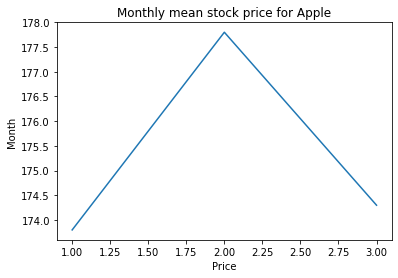

In [197]:
monthly_price.plot()
plt.ylabel('Month')
plt.xlabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()

### __Chapter 3.2: Are drug-related stops on the rise?__
---

In the last section, we created a plot to help us see how a single variable changed over time. In this section, we'll use subplots to help us examine the relationship between two variables over time.

#### Resampling the price
Let's return to our DataFrame of Apple stock prices. In the last section, we calculated the mean price for each month using a groupby() operation.  

In [198]:
apple.groupby(apple.index.month).price.mean()

date_and_time
1    173.8
2    177.8
3    174.3
Name: price, dtype: float64

There's actually an alternative method, known as resampling, that we can use to accomplish the same task. As you might remember from previous courses, resampling is when you change the frequency of your time series observations. In this case, we'll resample the price column by month, represented by the capital letter M, and then chain the mean() method onto the end.

In [199]:
apple.resample('M').price.mean()

date_and_time
2018-01-31    173.8
2018-02-28    177.8
2018-03-31    174.3
Freq: M, Name: price, dtype: float64

The output is identical to the groupby() operation, except that the index consists of the last day of each month, rather than just the integers 1, 2, and 3.

#### Resampling the volume
As a reminder, the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. Let's resample that column, to calculate the mean daily volume for each month. 

In [200]:
apple.volume

date_and_time
2018-01-08 16:00:00    56587377
2018-01-09 16:00:00    45067429
2018-02-08 16:00:00    64541647
2018-02-09 16:00:00    64480325
2018-03-08 16:00:00    56653442
2018-03-09 16:00:00    55750355
Name: volume, dtype: int64

In [201]:
apple.resample('M').volume.mean()

date_and_time
2018-01-31    50827403.0
2018-02-28    64510986.0
2018-03-31    56201898.5
Freq: M, Name: volume, dtype: float64

One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

#### Concatenating price and volume
Now that we've resampled both the price and volume data, we're going to combine the results into a single DataFrame so that we can study the relationship between price and volume. First, we'll save the two resampled Series as separate objects. One is called monthly_price and the other is called monthly_volume. 

In [202]:
monthly_price = apple.resample('M').price.mean()
monthly_volume = apple.resample('M').volume.mean()

Then, we'll combine these two objects using the concat() function, which concatenates pandas objects along a specified axis. In this case, we want them to be combined along the columns axis, meaning that we want them side-by-side. Notice that they aligned along their shared index. We'll save this new DataFrame as an object called monthly.

In [203]:
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')

#### Plotting price and volume (1)
To visualize the relationship between price and volume, we simply call the plot() method on the monthly DataFrame. pandas outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. 

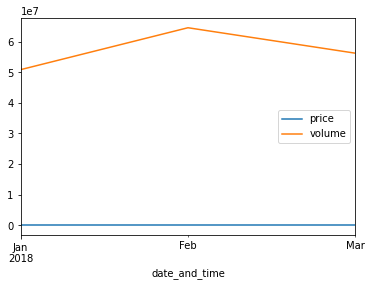

In [204]:
monthly.plot()

But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

#### Plotting price and volume (2)
The solution to this problem is to set the <font color = 'blue'>__subplots__</font> parameter to True, which results in two separate plots with independent y axes. Now we can clearly see the monthly trends for both price and volume. 

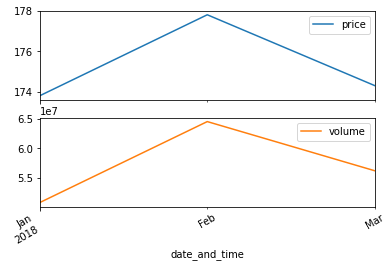

In [205]:
monthly.plot(subplots = True);

They appear to have an direct relationship, though we wouldn't actually draw that conclusion without having a lot more data.

### __Chapter 3.3: What violations are caught in each district__
---

In the last section, we saw how easy it is to create line plots directly from a DataFrame. Now, we're going to make different types of plots from DataFrames.

#### Computing a frequency table
One pandas function that might be new to you is crosstab(), short for cross-tabulation. To use crosstab(), you pass it two pandas Series that represent categories, and it outputs a frequency table in the form of a DataFrame. You can think of a frequency table as a tally of how many times each combination of values occurs in the dataset. In this case, we passed driver_race and driver_gender to crosstab(), and it tells us how many rows contain each combination of race and gender. For example, 551 Asian female drivers were stopped, which you can verify by filtering the DataFrame and checking the shape. Notice that race is along the index of the DataFrame and gender is along the columns, though you could transpose the DataFrame by reversing the order in which race and gender are passed to crosstab(). Let's go ahead and save the frequency table as an object called table.

In [206]:
pd.crosstab(ri.driver_race, ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [207]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 16)

In [208]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)

#### Selecting a DataFrame slice
As you might recall from previous courses, the loc accessor allows you to select portions of a DataFrame by label. Given our frequency table, let's pretend we wanted to select the Asian through Hispanic rows only. Using loc, we can extract this slice of the DataFrame by specifying the starting and ending labels, separated by a colon. Let's overwrite our existing table object with this smaller DataFrame.

In [209]:
table = table.loc['Asian':'Hispanic']

In [210]:
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


#### Creating a line plot
If we plot the table object, we'll get a line plot by default, in which the index is along the x-axis and each column becomes a line. However, a line plot is not appropriate in this case because it implies a change in time along the x-axis, whereas the x-axis actually represents three distinct categories.

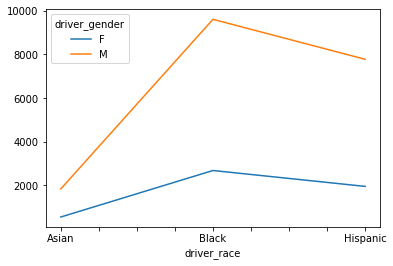

In [211]:
table.plot()
plt.show()

#### Creating a bar plot
By specifying kind equals bar, you can create a bar plot, which is much more appropriate than a line plot for comparing categorical data. With this plot, the numbers in our frequency table have been converted to bars for which the height represents the magnitude. Each gender has been assigned a color, and the two gender bars for each race are placed next to one another. The bar plot makes it especially easy to see the gender difference within each race. For all three races, we see that the number of males stopped is far greater than the number of females stopped.

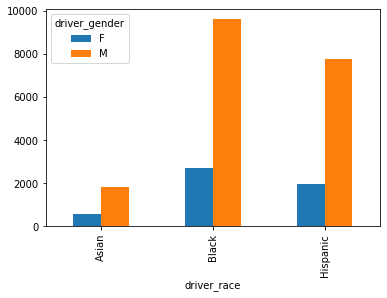

In [212]:
table.plot(kind = 'bar')
plt.show()

#### Stacking the bars
A variation of the bar plot is the stacked bar plot, which you can generate by adding the argument stacked equals True. For each race, the two gender bars are now stacked on top of one another. The strength of this plot is that it helps you to see the total stops for each race, which was not as obvious when the bars were side-by-side. By emphasizing the totals, however, this plot slightly deemphasizes the individual components of each bar, and makes those components harder to compare against one another. Neither type of bar plot is right or wrong, rather you should choose the plot that best helps to answer the question you're asking.

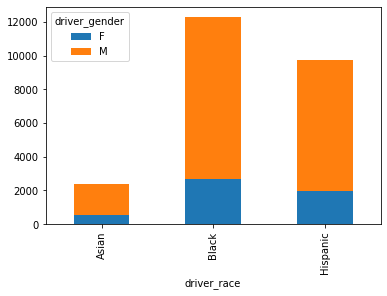

In [213]:
table.plot(kind = 'bar', stacked = True)
plt.show()

### __Chapter 3.4: How long might you be stopped for a violation?__

In this section, we'll start by learning how to translate strings into data that can be analyzed numerically, and then we'll learn a few easy ways to improve our plots.

#### Analyzing an object column

Let's return again to our DataFrame of Apple stock prices. A new column called change has been added to the DataFrame. It indicates whether the stock price went up or down compared to the previous trading day. Let's pretend we wanted to calculate how often the price went up. One way to do this would be to create a Boolean column that is True if the price went up, and False otherwise. Then we could easily calculate how often the price went up by taking the mean of the Boolean column. But how would we create this column? The change column has the object data type because it contains strings, and previously we've used the astype() method to convert strings to numbers or Booleans. However, astype() only works when pandas can infer how the conversion should be done, and that's not the case here. We'll need to find a different technique.

In [214]:
apple['change'] = ['down','up','up','down','up','up']

* Create a Boolean column: True if the price went up, and False otherwise
* Calculate how oen the price went up by taking the column mean


In [215]:
apple.change.dtype

dtype('O')

.astype() can't be used in this case

#### Mapping one set of values to another
When you need to map one set of values to another, you can use the Series map() method. You provide it with a dictionary that maps the values you currently have to the values that you want. In this case, we want to map "up" to True and "down" to False, so we'll create a dictionary called mapping that specifies this. Then, we'll use the map() method on the change column, pass it the mapping object, and store the result in a new column called is_up. When we print the DataFrame, you'll see that the is_up column contains True when the change column says up, and False when the change column says down. 

In [216]:
# Dictionary maps the values you have to the values you want
mapping = {'up':True,'down':False}
apple['is_up'] = apple.change.map(mapping)
apple

,price,volume,change,is_up
date_and_time,,,,
2018-01-08 16:00:00,177.3,56587377,down,False
2018-01-09 16:00:00,170.3,45067429,up,True
2018-02-08 16:00:00,177.3,64541647,up,True
2018-02-09 16:00:00,178.3,64480325,down,False
2018-03-08 16:00:00,175.3,56653442,up,True
2018-03-09 16:00:00,173.3,55750355,up,True


Now that we have a Boolean column, we can calculate how often the price went up by taking the mean() of that column. The answer is that it went up 66.6% of the time.

In [217]:
apple.is_up.mean()

0.6666666666666666

#### Calculating the search rate
Now we're going to return to our DataFrame of traffic stops, and shift to a completely separate topic. Let's say that we wanted to visualize how often searches were performed after each type of violation. We would group by violation, and then take the mean() of search_conducted. This calculates the search_rate for each of the six violation types, and returns a Series that is sorted in alphabetical order by violation. We'll save this as an object named search_rate.

In [218]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,is_arrested_numeric,inventory
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0,False
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,0.0,False
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,0.0,False
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,1.0,False
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,0.0,False


In [219]:
search_rate = ri.groupby('violation').search_conducted.mean()

#### Creating a bar plot
To visualize the search rate, we'll create a bar plot since we're comparing the search rate across categories. The violations are displayed on the x-axis, and the search rate is on the y-axis. This plot looks okay, but there are two simple changes we can make that will make this plot more effective.

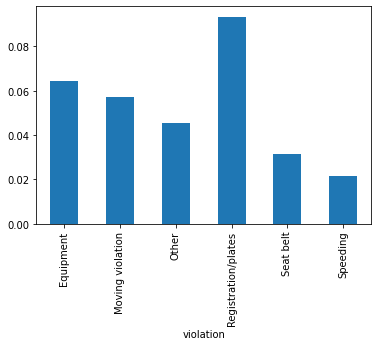

In [220]:
search_rate.plot(kind = 'bar')

#### Ordering the bars (1)
The first improvement we can make is to order the bars from left to right by size, which will make the plot easier to understand. All we need to do is to use the sort_values() method to sort the search_rate Series in ascending order.

In [221]:
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045351
Moving violation       0.057014
Equipment              0.064274
Registration/plates    0.093438
Name: search_conducted, dtype: float64

#### Ordering the bars (2)
Then, when we call the plot method on the sorted data, the bars are now ordered. This makes it easy to see which violations have the highest and the lowest search rates.

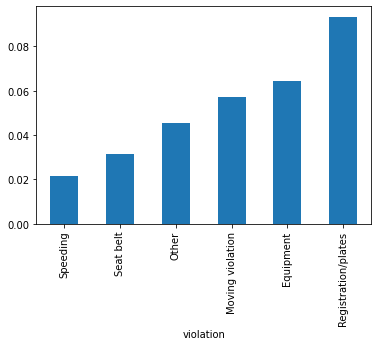

In [222]:
search_rate.sort_values().plot(kind = 'bar');

#### Rotating the bars
The second improvement we can make is to change the kind argument from __bar to barh__, which will rotate the bars so that they're horizontal. This makes it much easier to read the labels for each bar.

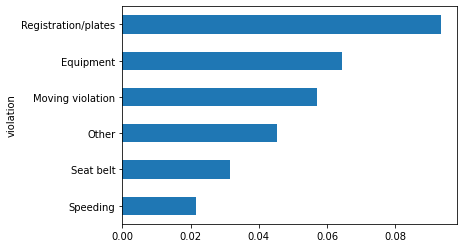

In [223]:
search_rate.sort_values().plot(kind = 'barh');

In [224]:
ri['stop_datetime'] = ri.stop_date.str.cat(ri.stop_time , sep = ' ')
ri['stop_datetime'] = pd.to_datetime(ri.stop_datetime)
ri.set_index('stop_datetime',inplace = True)

## <font color = 'blue'> __Chapter: 4. Analyzing the effect of weather on policing__ </font>
---

In this chapter, you will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. You will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills.

### __Chapter: 4.1. Exploring the weather dataset__
---
In the first three chapters, you analyzed a dataset of traffic stops from the state of Rhode Island. In this chapter, you'll be working with a new dataset to help you determine if weather conditions have an impact on police behavior.

#### Introduction to the dataset
The weather data you'll be using was collected by the National Centers for Environmental Information. Our hypothesis is that weather conditions impact police behavior during traffic stops, so ideally we would look up the historical weather at the location of each stop. However, the traffic stops dataset does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

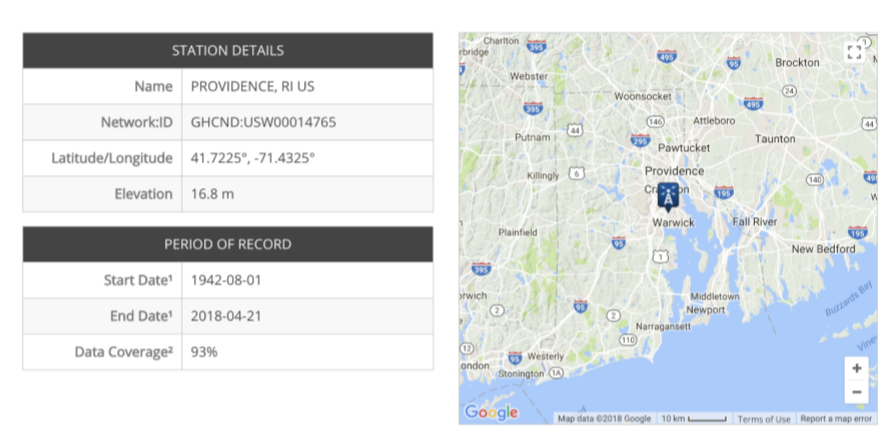

#### Examining the columns
Let's read the weather dataset into a DataFrame using read_csv(), and then look at the head. You can see that the station column lists the station ID, and there's one row for each date. There are three columns related to temperature, two columns related to wind speed, and 20 columns related to the presence of certain bad weather conditions.

In [225]:
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


* TAVG , TMIN , TMAX : Temperature 
* AWND , WSF2 : Wind speed
* WT01 ... WT22 : Bad weather conditions

#### Examining the wind speed
Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy. For example, let's take a look at the two columns related to wind speed. 

* AWND is average wind speed in miles per hour, and 
* WSF2 is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period. 



In [226]:
weather[['AWND','WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


We can use the describe() method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles.

In [227]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


Notice that the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These are all simple signs that the data is trustworthy.

#### Creating a box plot
Another way to examine these values is with a box plot, by specifying kind equals box when plotting. This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. Again, our goal here is simply to validate that the data looks reasonable.

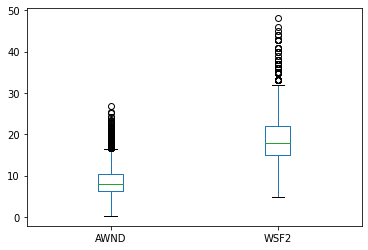

In [228]:
weather[['AWND','WSF2']].plot(kind = 'box')
plt.show()

#### Creating a histogram (1)
It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row. We'll do this by subtracting the average speed from the fastest speed and storing the results in a new column. We'll visualize the new column using a histogram so that we can see its distribution. 

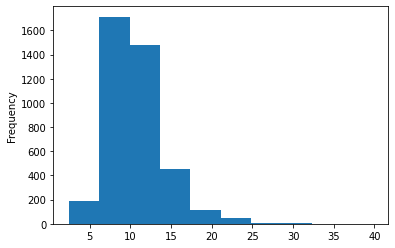

In [229]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind = 'hist')
plt.show()

There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

#### Creating a histogram (2)
We can make the shape more clear by changing the number of histogram bins to 20. This creates more narrow bins than the default value of 10. 

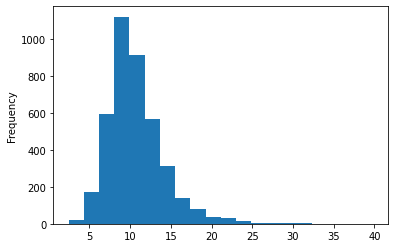

In [230]:
weather.WDIFF.plot(kind = 'hist',bins = 20)
plt.show()

We can now see that the difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

### __Chapter: 4.2. Categorizing the weather__
---
Now that we've reviewed the weather dataset and concluded that it's a trustworthy source, we can start preparing it for analysis. But first, let's review a few pandas techniques we'll be using.

#### Selecting a DataFrame slice (1)
The weather DataFrame has 4,017 rows and 28 columns. Let's say that we wanted to copy the three temperature columns to a new DataFrame called temp. How might we do this?

In [231]:
weather.shape

(4017, 28)

In [232]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF'],
      dtype='object')

#### Selecting a DataFrame slice (2)
You might recall that the loc accessor allows you to extract a DataFrame slice by specifying the starting and ending labels of your desired selection. In this case, 

* We'll select all rows (represented by the first colon) and 
* The columns TAVG through TMAX and save them to temp. 



In [233]:
temp = weather.loc[:,'TAVG':'TMAX']

In [234]:
temp.shape

(4017, 3)

You can see that the temp DataFrame contains all 4,017 rows but just 3 columns. This method is particularly useful when you need to select a large number of columns that are side-by-side.

#### DataFrame operations
Let's take a look at the head of temp. 

* What would happen if you used the sum() method on the DataFrame? pandas will actually return the sum of each of the three columns. 

* But what if you wanted to calculate the sum of each row? You can do this by specifying axis equals columns, and you'll see that each value is the sum of the three temperature values in that row. 


In [235]:
# head of temp
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [236]:
# use sum method on the data frame
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [237]:
# calculate the sum of each row
temp.sum(axis = 'columns')

0       132.0
1       108.0
2       146.0
3       126.0
4       107.0
        ...  
4012    156.0
4013    114.0
4014    101.0
4015     92.0
4016    124.0
Length: 4017, dtype: float64

You may find it confusing that specifying the columns axis leads pandas to calculate row sums. But for mathematical operations, the axis specifies the array dimension that is being aggregated, and aggregating the columns is how you combine the data for each row.

#### Mapping one set of values to another
Let's return to the traffic stops dataset and the stop_duration column. You might remember that you can map one set of values to another using the Series map() method. 

In [238]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In this case, we'll create a dictionary that maps the stop_duration values to the strings short, medium, and long. Then we'll use the map() method to create a column called stop_length. The stop_length column has the object data type since it contains string data.

In [239]:
# Dictionary for mapping
mapping = {
    '0-15 Min':'short',
    '16-30 Min':'medium',
    '30+ Min':'long'
}

# stop length
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

#### Changing data type from object to category (1)
Whenever you have an object column with a small number of possible values, as is the case here, you may want to change its data type to category. The main reason to use the category type is that it stores the data more efficiently than the object type. Another reason is that it allows you to specify a logical order for the categories. 

In [240]:
ri.stop_length.unique()

array(['short', 'medium', nan, 'long'], dtype=object)

> Category type stores the data more efficiently

> Allows you to specify a logical order for the categories


Before we change the data type of the stop_length Series, we'll use a Series method to calculate its current memory usage, which is over 6 megabytes.

In [241]:
ri.stop_length.memory_usage(deep=True)

6276330

#### Changing data type from object to category (2)
To change the data type, we first create a Python list called cats that defines the logical order of the categories. 

In [242]:
cats = ['short', 'medium', 'long']

Secound, 

> First we import the library __categoricalDtype__. 

> Set the categories to cats and order true then we pass it to the astype

In [243]:
# import library
from pandas.api.types import CategoricalDtype

# set category in CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)

# In last pass it to the astype
ri['stop_length'] = ri.stop_length.astype(cat_type)

#### Using ordered categories (1)
Let's take a look at the head of this column. 

In the bottom two lines, you can see that the dtype is now category and the categories are ordered from short to long. 

Because of the ordering, you can now use comparison operators with this column.

In [244]:
ri.stop_length.head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

#### Using ordered categories (2)
For example, you can specify that stop_length is greater than short in order to filter the DataFrame to only include medium or long stops. In addition, pandas will automatically sort ordered categories logically rather than alphabetically, which can make the results of a calculation easier to understand.

In [245]:
ri[ri.stop_length > 'short'].shape

(16960, 17)

In [246]:
ri.groupby('stop_length').is_arrested_numeric.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261491
Name: is_arrested_numeric, dtype: float64

### __Chapter: 4.3. Merging datasets__
---
Now that we've assigned a rating to the weather conditions each day, we need to merge that data with the traffic stop data so that we can analyze the relationship between weather and police behavior. Let's review how to merge two DataFrames.

In [247]:
apple = pd.DataFrame()
apple['date'] = ['2/14/18','2/14/18','2/15/18','2/15/18']
apple['time'] = ['9:30','16:00','9:30','16:00']
apple['price'] = [163.04,167.37,169.79,172.99]

In [248]:
apple['date_and_time'] = pd.to_datetime(apple.date.str.cat(apple.time, sep = ' '))

In [249]:
apple.set_index('date_and_time',inplace = True)

In [250]:
high_low = pd.DataFrame()
high_low['DATE'] = ['2/14/18','2/15/18','2/16/18']
high_low['HIGH'] = [167.54, 173.09, 174.82]
high_low['LOW'] = [162.88,169.00,171.77]

#### Preparing the first DataFrame
We'll return to the DataFrame of Apple stock prices that we've used throughout the course. This time, the opening price at 9:30 AM and closing price at 4:00 PM are listed for each day in separate rows. Shortly, we're going to merge the apple DataFrame with another DataFrame. Because the index will be lost during the merge, we want to save it by moving it to a DataFrame column. We'll do this by using the reset_index() method and specifying that the operation should occur in place. You can see that date_and_time is now a DataFrame column, and the index is now the default integer index.

In [251]:
apple

,date,time,price
date_and_time,,,
2018-02-14 09:30:00,2/14/18,9:30,163.04
2018-02-14 16:00:00,2/14/18,16:00,167.37
2018-02-15 09:30:00,2/15/18,9:30,169.79
2018-02-15 16:00:00,2/15/18,16:00,172.99


In [252]:
apple.reset_index(inplace=True) 
apple

,date_and_time,date,time,price
0,2018-02-14 09:30:00,2/14/18,9:30,163.04
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 09:30:00,2/15/18,9:30,169.79
3,2018-02-15 16:00:00,2/15/18,16:00,172.99


#### Preparing the second DataFrame
The second DataFrame we're working with is called high_low, and it contains the highest and lowest prices the Apple stock reached each day. We'd like to include the high data in the apple DataFrame, which we can do by merging the DataFrames. For the merge operation, we only need two columns from high_low: the date column, since it's the column on which the DataFrames will be joined, and the high column, since it's the column of interest. Thus, we'll create a new DataFrame called high that only includes these two columns.

In [253]:
high = high_low[['DATE','HIGH']]

#### Merging the DataFrames
To merge the apple and high DataFrames, we'll use the pd dot merge() function and save the result as apple_high. Let's review the five arguments. 

* First, we specified the left and right DataFrames. Apple is defined as left and high is defined as right because we wanted to join the high DataFrame onto the apple DataFrame. 

* Next, we specified the columns on which to join the DataFrames. Both DataFrames have a column containing the date, but we had to specify them separately because the column name is lowercase in the left DataFrame and uppercase in the right DataFrame. 

* Finally, we specified the type of join. We used a left join in order to keep all of the rows from the left DataFrame regardless of whether there were matches in the right DataFrame.

In [254]:
apple_high = pd.merge(left = apple, right=high, left_on = 'date', right_on = 'DATE', how = 'left')

In [255]:
apple_high

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
1,2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2,2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
3,2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


> left=apple : Le DataFrame 

> right=high : Right DataFrame 

> left_on='date' : Key column in left DataFrame 

> right_on='DATE' : Key column in right DataFrame 

> how='left' : Type of join

#### Comparing the DataFrames
Let's compare the merged DataFrame with the original two DataFrames. The first four columns of apple_high are identical to apple. The data in the final two columns of apple_high came from the high DataFrame. Because the apple DataFrame contained two rows each from February 14 and 15, the high value of each of those dates appears twice in the apple_high DataFrame. But since the apple DataFrame did not contain any rows from February 16, the February 16 value from the high DataFrame was ignored.

In [256]:
apple_high

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
1,2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2,2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
3,2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


In [257]:
apple

,date_and_time,date,time,price
0,2018-02-14 09:30:00,2/14/18,9:30,163.04
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 09:30:00,2/15/18,9:30,169.79
3,2018-02-15 16:00:00,2/15/18,16:00,172.99


In [258]:
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


#### Setting the index
Since the merge is complete, we'll set the date_and_time column as the index of the apple_high DataFrame. This replaces the default index and reduces the number of columns to five.

In [259]:
apple_high.set_index('date_and_time', inplace=True) 
apple_high

,date,time,price,DATE,HIGH
date_and_time,,,,,
2018-02-14 09:30:00,2/14/18,9:30,163.04,2/14/18,167.54
2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2018-02-15 09:30:00,2/15/18,9:30,169.79,2/15/18,173.09
2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


### __Chapter : 4.4. Does weather affect the arrest rate?__
---
Now that we've merged the weather and traffic stop data, we can analyze the relationship between weather and police behavior.

#### Driver gender and vehicle searches
In a previous chapter, we investigated the relationship between driver gender and vehicle searches. 

* First, we calculated the percentage of all stops that led to a search by taking the mean() of the Boolean Series search_conducted. This is called the search rate. 

* Then, we compared the search rates for male and female drivers by using a groupby() on driver_gender before taking the mean() of search_conducted. We found that male drivers are searched more than twice as often as female drivers.

In [260]:
ri.search_conducted.mean()

0.03604713268876511

In [261]:
ri.groupby('driver_gender').search_conducted.mean() 

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

#### Driver gender and vehicle searches
Finally, we added violation to the groupby() operation. Our hypothesis was that search rate varies by violation type, and the difference in search rate between males and females is perhaps because they tend to commit different violations. 

In [263]:
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

The results disproved our hypothesis, because the search rate is higher for males than for females across all violations. This doesn't prove a causal link between gender and vehicles searches, but it does show a correlation.

#### Examining a multi-indexed Series
Let's save the results of the previous operation as new object called search_rate, and print it out again. What type of object is this? It may look like a DataFrame because of its structure, but it's actually a pandas Series that has a MultiIndex. 

Violation and driver_gender are not columns, rather they're the names of the index levels. You've seen the MultiIndex before in the context of a DataFrame. With a DataFrame, which is normally two dimensions, the MultiIndex adds a third dimension. With a Series, which is normally one dimension, the MultiIndex adds a second dimension.

In [265]:
display(type(search_rate),type(search_rate.index))

pandas.core.series.Series

pandas.core.indexes.multi.MultiIndex

#### Working with a multi-indexed Series
Let's print out the search_rate Series again.

In [267]:
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Working with a multi-indexed Series is actually very similar to working with a DataFrame. You can think of the outer index level, violation, as the DataFrame rows, and the inner index level, driver_gender, as the DataFrame columns. For example, we can use the loc accessor to select the Equipment row.

In [266]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

This returns the search rate by gender for equipment violations only. Or, we can specify the Equipment row and the Male column to select a particular value in the Series.

In [268]:
search_rate.loc['Equipment','M']

0.07149643705463182

#### Converting a multi-indexed Series to a DataFrame
You might think that if a multi-indexed Series is similar to a DataFrame, then there should be a way to convert one to the other. In fact, if you unstack() the search_rate Series, it actually results in a DataFrame. 

In [270]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [271]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

This is a useful technique any time you have a Series with a MultiIndex, since you're probably more comfortable manipulating a DataFrame. You might also think that there should be an easy way to create this DataFrame without using a groupby and an unstack.

#### Converting a multi-indexed Series to a DataFrame
In fact, you can use a pivot table to produce the exact same DataFrame. 
* Violation is the index, 
* driver_gender is the columns, and 
* The mean of search_conducted is the values. 

Recall that mean() is the default aggregation function for a pivot table, but you can choose another function instead.

In [272]:
ri.pivot_table(index='violation', columns='driver_gender', values = 'search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885
